In [1]:
#Importing Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

Using TensorFlow backend.


We are using keras.datasets library to import dataset. The dataset is divided in four parts.
<li>x_train- Training Samples (Size- 60000*28*28). Resized to (Size- 60000*784) as 2D arrays are easy to work with.
<li>y_train- Testing Samples (Size- 10000*28*28). Resized to (Size- 60000*784) for the same reason.
<li>x_test- Training Labels (Size- 60000*1)
<li>y_test- Testing Labels (Size- 10000*1)

<li>The dataset chosen for this project is known as fashion MNIST.
<li> The dataset presents a simple <b>multiclass classification problem</b>
<li>Fashion MNIST is very similar in structure to MNIST dataset
<li>We have already worked on MNIST dataset before and applied different classification algorithms on it
<li> We wanted to to start with simple model building on Keras and understand the basics first
<li> We wanted a dataset that we were comfortable working with, and which could provide good accuracy on simple dense neural networks.
<li>We could then move on to bigger datasets after getting a grasp of how to use Keras, and how neural network works in general
<li>Fashion MNIST feels like a perfect dataset for this very reason
<li>Similar to MNIST dataset, the dataset has 70000 samples, divided into 60000 samples as training data and 10000 samples .
<li>A sample consist of 28*28 image. This image can represent one of 10 different classes.
<li>The samples are converted to 784 features by reshaping all the samples from 28*28 to 784.
<li>The train label & test label are each of the size (60000*1) & (10000*1).
<li>The labels (target) provides the class for each image in the sample.

<li>The images below shows sample images of all the classes.
<li>The code after that finds the mean of all classes in the dataset. 
<li>The image of the mean are are alsoprinted below.
<li>This mean images gives us an idea on what an image of each class look like.

In [3]:
#Code to find the samples of each class
train_data=np.zeros([x_train.shape[0],x_train.shape[1]+1])
train_data[:,:-1]=x_train
train_data[:,-1]=y_train
class_list=[]
for i in range(0,10):
    class_data=[train_data[train_data[:,-1]==i]]
    class_list.append(class_data)


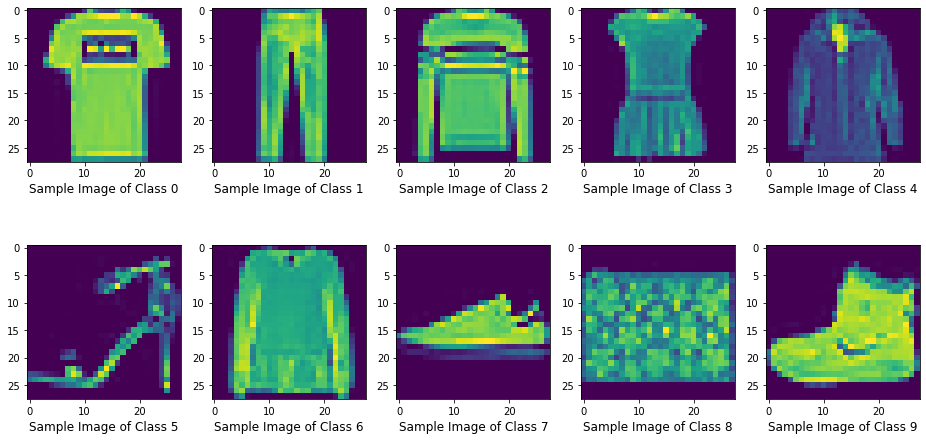

In [4]:
#Code to Print the sample image of each class
images=[]
for i in range(0,10):
    images.append(class_list[i][0][0])
plt.figure(figsize=(16,8))
for i in range(len(images)):
    plt.subplot(2,5,i+1)
    img=images[i].reshape(-1,1)
    img=img[:-1]
    img=img.reshape(28,28)
    plt.imshow(img)
    plt.xlabel('Sample Image of Class '+str(i),fontsize = 12)

In [5]:
#Code to find the mean of the classes
classes=np.unique(y_train)
train_data=np.ones([x_train.shape[0],x_train.shape[1]+1])
train_data[:,:-1]=x_train
train_data[:,-1]=y_train
mean_v=[]
var_v=[]
for c in classes:
    trainX_c=train_data[train_data[:,-1]==c]   #Filter samples for each class
    trainX_c=trainX_c[:,:-1]           #
    mean_v.append(trainX_c.mean(axis=0))#Find mean of each class & save in corresonding mean matrix

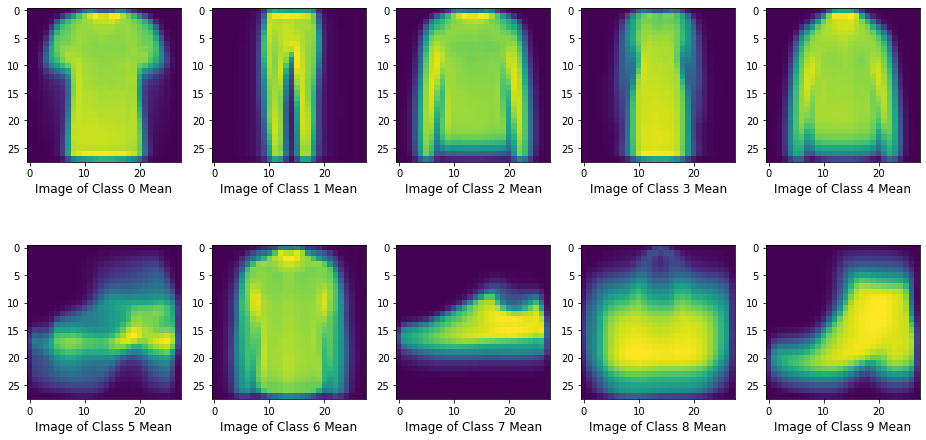

In [6]:
#Code to print Mean of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(len(mean_v)):
    plt.subplot(2,5, i+1)
    img = mean_v[i].reshape(28,28)
    plt.imshow(img)
    plt.xlabel('Image of Class '+str(i)+' Mean',fontsize = 12)

<li>The figure shows the class description in the sample data.
<li>The label value ranges from 0 to 9 and each value represent a different fashion item like triuser, shirt, sneaker, etc

In [7]:
%%html
<img src="class.PNG",width=100,height=50>

<li>The next step is to normalize the data. 
<li>Our data are represented by greyscale 28 * 28 images. The pixel size range from 0 to 255.
<li>We implemented minmax normalization on the data, changing all the values in the range 0 to 1 (lowest=0 & highest=1)
<li>Normalization is done columnwise(axis=1) as each column represent a feature of the image
<li>Scaling (ie normalization) can be useful for a variety of reason, like uniform values, low memory use. Non normalized data can also lead to problems in some functions like sigmoid. This happened in our last project during weight calculation for logistic regression
<li>We have used l2 normalization here. l2 modifies the dataset values in a way that in each row the sum of the squares will always be up to 1

Next, We have changed the training and test labels into categorical form as we are using categorical_crossentropy loss function while compiling the model and our classification is multiclass. Here we make the labels from a (x,1) dimensional matrix to (x,10) dimensional matrix as we have 10 classes here, such that, if label=1 then that position will be 1 and all other values will be zero in that row.  
<br>
[x=number of samples]
<br>
For example, if label=5 then that row will look like follows,
<br>
[0,0,0,0,0,1,0,0,0,0,0]

<h3>k-FOLD CROSS VALIDATION</h3>

In k-Fold Cross Validation, we divide the training dataset in k parts, then for k iterations- use 1 part for testing and the other k-1 for training the model. This concept is illustrated below using an image:

In [8]:
%%html
<img src="k-fold.PNG",width=100,height=50>

Now we implement k-fold cross-validation using sklearn library.
k-fold validation is useful for a variety of reasons:
<li>We make predictions on all our training data
<li>Parameters of Biased test set during an iteration are nullified by the other test sets
<li>It is the most comprehensive way to ensure that the model works

The inputs to the cross-validation can be used to find the best parameters for our model.
Our cross-validation function takes multiple features-
<li> x_train = training feature
    <li>y_train = training labels
        <li>act = activation function used
            <li> u1 = number of nodes in 1st layer
                <li> u2 = number of layers in 2nd layer
                    <li> u3 = number of layers in 3rd layer
<br><br>
The arguments act, u1, u2 & u3 can be used to test various parameters to the function. Since  the accuracy of k-fold is so robust, we are assured that the accuracy that we get from cross-valdation will be quite accurate. This can be used for determing which parameters to the model will fulfil our requirements.

In [9]:
#Import KFold library from sklearn
from sklearn.model_selection import KFold

#Function cross_validation
def cross_validation(x_train,y_train,act,u1,u2,u3):
    loss_list=[] #List to save loss in each iteration
    acc_list=[]  #List to save Accuracy in each iteration
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    iter_val=1 #Variable to print iteration value

    for train_index, test_index in kf.split(x_train):
        print('---------------------------------------------------------------')
        print('Iteration:',iter_val) #Print Iteration
        #Split the training & test samples in the current iteration
        X_trainc, X_testc = x_train[train_index], x_train[test_index]
        #Split the training & test in the current iteration
        y_trainc, y_testc = y_train[train_index], y_train[test_index]
        #Sending the k-fold training and test sets for evaluation
        loss,accuracy=evaluation(X_trainc, X_testc, y_trainc, y_testc,act,u1,u2,u3)
        print('Accuracy of Iteration:',iter_val,'is',accuracy) # The accuracy of the iteration
        print('Loss of Iteration:',iter_val,'is',loss) # The loss of the iteration
        loss_list.append(loss)  #Saving each iteration loss in a list
        acc_list.append(accuracy)  #Saving each iteration accuracy in a list
        iter_val+=1  #Incrementing counter for the next iteration
    #A new dataframe is formed that has the loss and accuracy of all iterations
    data=pd.DataFrame({'Accuracy':acc_list,'Loss':loss_list}) 
    #Mean accuracy of all the k-folds are calculated
    model_accuracy=np.mean(acc_list)
    return (model_accuracy,data)

The evaluation function  takes input in the form of training & test data as well as the various parameters from the cross-validation function, and performs all the operations required to produce the prediction on the test data. The functions used in this evaluation function are discussed in later.

In [10]:
def evaluation(X_trainc, X_testc, y_trainc, y_testc,act,u1,u2,u3): #takes all the inputs from Cross-validation function
    #Normalize Train & Test Data set as discussed earlier
    X_trainc=sklearn.preprocessing.normalize(X_trainc, norm='l2', axis=1, copy=True, return_norm=False)
    X_testc=sklearn.preprocessing.normalize(X_testc, norm='l2', axis=1, copy=True, return_norm=False)
    
    #Normalize Train & Test Data set as discussed earlier
    y_trainc=tf.keras.utils.to_categorical(y_trainc)
    y_testc=tf.keras.utils.to_categorical(y_testc)
    
    #Creating a sequential model
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=u1,activation=act,input_shape=(784,)))# An input dense layer with size u1 is created
    model.add(tf.keras.layers.Dense(units=u2,activation=tf.nn.relu))# A hidden layer of size u2 is added
    model.add(tf.keras.layers.Dense(units=u3,activation=tf.nn.relu))# A second hidden layer of size u3 is added
    model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#Output layers that provides predictions for the 1 class is added
    #The model is compiled using categorical_crossentropy loss function & RMSProp oprimizer
    model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
    
    #The model is then trained using the training sample and labels
    model.fit(X_trainc,y_trainc,epochs=5,batch_size=40,verbose=0)
    #The trained model is used to predict and evaluate the prediction. Returns loss & accuracy
    
    test_loss,test_acc=model.evaluate(X_testc,y_testc,verbose=0)
    
    #Test loss & accuracy returned to the cross validation function
    return (test_loss,test_acc)

<h4>TESTING CROSS-VALIDATION FUNCTION</h4>

<h4>Instance 1:</h4>

In [11]:
#Here activation function is taken as relu and number of nodes are taken as 100,50 & 20 for the input & hidden layers
accuracy,data=cross_validation(x_train,y_train,'relu',100,50,20)

---------------------------------------------------------------
Iteration: 1
Accuracy of Iteration: 1 is 0.8703333
Loss of Iteration: 1 is 0.3512831414937973
---------------------------------------------------------------
Iteration: 2
Accuracy of Iteration: 2 is 0.8746667
Loss of Iteration: 2 is 0.3480554323593775
---------------------------------------------------------------
Iteration: 3
Accuracy of Iteration: 3 is 0.87325
Loss of Iteration: 3 is 0.35450399337212246
---------------------------------------------------------------
Iteration: 4
Accuracy of Iteration: 4 is 0.87366664
Loss of Iteration: 4 is 0.345637303451697
---------------------------------------------------------------
Iteration: 5
Accuracy of Iteration: 5 is 0.8745
Loss of Iteration: 5 is 0.3466601120829582


In [12]:
#The dataframe containing the loss & accuracy of k iterations is printed below:
data

,Accuracy,Loss
0,0.870333,0.351283
1,0.874667,0.348055
2,0.873250,0.354504
3,0.873667,0.345637
4,0.874500,0.346660


In [13]:
#The accuracy of the instance is printed below
print('Accuracy of instance 1:',accuracy)

Accuracy of instance 1: 0.87328327


<h4>Instance 2:</h4>

In [14]:
#Here activation function is taken as tanh and number of nodes are taken as 200,100 & 40 for the input & hidden layers
accuracy,data=cross_validation(x_train,y_train,'tanh',200,100,40)

---------------------------------------------------------------
Iteration: 1
Accuracy of Iteration: 1 is 0.8731667
Loss of Iteration: 1 is 0.353855458488067
---------------------------------------------------------------
Iteration: 2
Accuracy of Iteration: 2 is 0.87375
Loss of Iteration: 2 is 0.3471905014018218
---------------------------------------------------------------
Iteration: 3
Accuracy of Iteration: 3 is 0.8735
Loss of Iteration: 3 is 0.346625284632047
---------------------------------------------------------------
Iteration: 4
Accuracy of Iteration: 4 is 0.87558335
Loss of Iteration: 4 is 0.3487801222205162
---------------------------------------------------------------
Iteration: 5
Accuracy of Iteration: 5 is 0.8681667
Loss of Iteration: 5 is 0.36233109613259634


In [15]:
#The dataframe containing the loss & accuracy of k iterations is printed below:
data

,Accuracy,Loss
0,0.873167,0.353855
1,0.873750,0.347191
2,0.873500,0.346625
3,0.875583,0.348780
4,0.868167,0.362331


In [16]:
#The accuracy of the instance is printed below
print('Accuracy of instance 2:',accuracy)

Accuracy of instance 2: 0.8728334


This is just a simple example on how different parameters can be used on cross validation function to find best model. The cross validation function can be modified such that it takes other parameters like batch size, epoch_no, optimizers as arguments. These arguments can then be used to find the best model according to requirement.

<b>MULTICLASS CLASSIFICATION PROBLEM</b>

<li>The Keras is a neural network API. We develop our first neural network here.
<li> First we initialize the model as a Sequential model
<li>We make 4 layers in this model. 
<li>The first is input layer with 400 nodes.
<li>The second and third are hidden layers, each of nodes 200 & 100
<li>The final layer is the output layer, that has 10 nodes as output. Each output node represent a class in the data
<li>The below figure represent our model and is printed using the plot_model function:<br>
plotmodel=plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
#Normalization of data and Categorization of Labels.
x_train=sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
x_test=sklearn.preprocessing.normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)

In [18]:
#Changing the labels to categorical form for categorical_crossentropy 
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [19]:
%%html
<img src="model_plot.PNG",width=100,height=20>

In [20]:
#creating the model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=400,activation=tf.nn.relu,input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])

Our neural network can be represented by the image below:

In [21]:
%%html
<img src="Neuralnetwork.PNG",width=100,height=20>

<b>Keras.Sequential()</b><br>
We are building a Keras Sequential model API for our classification problem. The sequential API allows you to create models layer-by-layer. 
<br>

<b>Layers in Keras</b><br>
Keras layers are the primary building block of Keras models. Each layer receives input information, do some computation using the activation function and finally output the transformed information . The output of one layer will move to the next layer as its input. 

<b>A Keras layer requires:</b><br>
<li>Shape of the input (input_shape) to understand the structure of the input data. In the first layer, it is necessary to specify the input shape.
<li>Initializer to set the weight for each input 
<li>Activators to transform the output to make it non-linear. 
<li>Constraints that restricts and specify the range in which the weight of input data to be generated
<li>Regularizer will dynamically apply penalties on the weights during optimization process.

<br><br>
<b>Keras.layers.Dense</b><br>
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.<br>
<b>output = activation(dot(input, kernel) + bias), where</b>
<li>input: Input features
<li>Kernel: Weights
<li>dot: Numpy dot product of inputs and corresponding weights

<br>
<b>Important Arguments in Keras Dense Layer:</b><br>

<li>units: Positive integer, Number of nodes of the layer.(400, 200, 100 & 10 in our Dense layers)
<li>activation: Activation function applied to the input of the layer. If nothing is supplied, no activation is applied (ie. "linear" activation: a(x) = x). (We used tf.nn.relu as our activation function)
<li>use_bias: Boolean, whether the layer uses a bias vector. (Default Bias is used in our code & it is True)
<li>kernel_initializer: Initializer for the kernel (weights). (glorot_uniform is the default). Glorot_uniform takes a random sample from a uniform distribution within a certain limit.
<br>
<b>Activation Function</b><br>
Activation Function provides non-linearity into an output. The function defines which neurons will be activated and what bias would be added to the the output. Due to the transformation of the input from one layer to the other using actuavtion function, complex models can be added to the input.

We used <b>tf.nn.relu</b> as the activation function in hidden layers, while using tf.nn.softmax for the output layer.

Types of Activation Function:
1. Sigmoid Function-<br>
Sigmoid Function is mathematically defined as <b>(1/1+e<sup>-x</sup>)</b>. Sigmoid function is a S-shaped curve with rnage from 0 to 1, with 0 signalling the sample does not belong to the class and 1 signalling the sample has 100% chance that it belongs to the class (for a given category). The problems with sigmoid function is that for large values, the gradient becomes 0 (ie parallel to x-axis). When updating the weights, the small local gradient is multiplied with other gradients, effectively making the gradient very small. This affects the weights, and hamper learning.<br>
2. Tanh Function (Hyperbolic tangent)-<br>
Tanh Function is defined as <b>1 — exp(-2x) / 1 + exp(-2x)</b>. It has the same problems as sigmoid function.<br>
3. Relu Function (Rectified linear units)-<br>
ReLu is a non-linear function and is defined as <b>f(x)=max(0,n)</b>. It solves the problem of gradient saturation, as the function does not have a lower/upper bound and errors can be carried between layers. It is also computationally faster than sigmoid & tanh. However, ReLu cannnot be used for negative values.<br>
4. Softmax Function<br>
Softmax is used in the output layer of our model. It takes the logits from the last hidden layer, take their exponent values and divides it with the sum of all exponents. It basically turns the output from the last hidden laye and converts them into probabilities.<br>
<b>Formula: f(x<sub>i</sub>)= e<sup>x<sub>i</sub></sup>/∑<sub>j</sub>e<sup>x<sub>j</sub></sup></b>

<b>Question 3.</b><br><b> Show how to compile the keras model, choosing the loss function, optimizer, etc. Describe the choices you made and why. Describe what other choices could be made here.</b>

This is the compile function below. According to our requirements: Adam, RMSProp and SGD can be used. With testing, we found that Adam & SGD gives us the best results

In [22]:
#A demonstration of the Compile function
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
#Summary of Our Model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_41 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In the compilation step of the model we define the loss function, optimization procedure and the metrics. This is a very important process before we proceed to fit the training data, because we will be able to train the training data only if we know what is the loss function used and what is the optimization procedure. There are a variety of loss functions. We have mentioned a few of them below:
    <li> <b> mean_squared_error:</b> The square of the difference between true and predicted values.
    <li> <b> mean_absolute_error:</b> The absolute value square of the difference between true and predicted values.
    <li> <b> hinge:</b> It is used for maximum margin classification.
    <li> <b> categorical_hinge:</b> It is the same as hinge loss but applicable to multiclass classification.
    <li> <b> binary_crossentropy</b> Negative log of likelihood (Used for binary classification).
    <li> <b> categorical_crossentropy</b> Negative log of likelihood (Used for multiclass classification).
    <br>
    <br>
    We have used <b>categorical_crossentropy</b> in our model as it is used for a multiclass problem.
    <br>
    <br>
Now, optimization is one of the two arguments of model compilation. It is responsible for updating the kernels (i.e, weights) and the bias of each layer. There are various types of <b>Optimizers</b> used in a Keras model. We will study about a few of them, namely,
<li> <b> SGD:</b> It stands for Stochastic Gradient Descent. Here, the weights are updated for each training sample.
<li> <b> RMSPROP:</b>It is a gradient based optimization technique. It uses the moving average of squared gradients to normalize the gradient itself. It restricts the oscillation in vertical direction, so we can make the laerning rates big and thus converge to the solution faster.
    <li> <b> ADAM:</b> It stands for Adaptive Moment Estimation. It is one of the adaptive weight techniques where learning rate depends on the parameters. That is, here smaller updates are done for frequent parameters and large updates are done for infrequent parameters. ADAM is quite like RMSPROP, but with Momentum. This process is comparatively faster than other process and converges at a lesser time than the other processes.
        <br>
        <br>
        For the above given reasons, we chose ADAM/SGD as the optimizer in our Keras Model, based on the result we get in the next step.
        <br>
        <br>
        Metric is a function used to judge how good our model performed. Metric function is supplied to the "metrics" argument during the compilation of model. We used accuracy as our metric function.

<b>Question 4.</b><br><b> Fitting the model.</b><br> 
Show how to fit the keras model to your training data. Describe the parameters and the choices you made.

This is the format of our Fit function

In [24]:
EPOCHS=8  
BATCH_SIZE=128
model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE) #fitting the model,i.e, training step

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5824 - accuracy: 0.7891
Epoch 2/8
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3852 - accuracy: 0.8608
Epoch 3/8
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3432 - accuracy: 0.8740
Epoch 4/8
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3162 - accuracy: 0.8827
Epoch 5/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2952 - accuracy: 0.8905
Epoch 6/8
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2798 - accuracy: 0.8947
Epoch 7/8
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2642 - accuracy: 0.9027
Epoch 8/8
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2531 - accuracy: 0.9043


Model.fit function is used to train the model. This means  The model that is selected through cross-validation learns from the training data.<br><br>
<b>Model.fit function takes the following inputs:</b><br>
<li> x- This is the input or training data. It can be in the format of Numpy array (or list of numpy arrays), dictionary or keras.utils.Sequence output
<li> y- This is the target dataor label, on which the training data is trained on. We have 10 different classes in our Test data. 
<li> epochs-Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
<li> batch_size- Number of samples per gradient update. If unspecified, batch_size will default to 32. We have kept our batch size as 40.

<b>We now test Adam & SGD Optimizer and choose the one that provides the better accuracy.</b>

<h4>Using Adam Optimizer</h4>

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #compilation using Adam optimizer
EPOCHS=8
BATCH_SIZE=128
model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE) # training using Adam optimizer

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2412 - accuracy: 0.9096
Epoch 2/8
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2301 - accuracy: 0.9140
Epoch 3/8
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2223 - accuracy: 0.9171
Epoch 4/8
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2153 - accuracy: 0.9188
Epoch 5/8
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2044 - accuracy: 0.9230
Epoch 6/8
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1976 - accuracy: 0.9256
Epoch 7/8
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1906 - accuracy: 0.9280
Epoch 8/8
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1845 - accuracy: 0.9306


In [26]:
#test using Adam optimizer
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0) 
print('Test Loss with the Adam Optimizer:',test_loss)
print('Test Accuracy with Adam Optimizer:',test_acc)

Test Loss with the Adam Optimizer: 0.32497140573263167
Test Accuracy with Adam Optimizer: 0.8891


<b>Using SGD Optimizer</b>

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy']) #model compilation using SGD optimizer
EPOCHS=8
BATCH_SIZE=40
model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE) #training using SGD optimizer

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1464 - accuracy: 0.9466
Epoch 2/8
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1400 - accuracy: 0.9487
Epoch 3/8
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1372 - accuracy: 0.9495
Epoch 4/8
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1357 - accuracy: 0.9501
Epoch 5/8
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1344 - accuracy: 0.9511
Epoch 6/8
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1335 - accuracy: 0.9512
Epoch 7/8
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1321 - accuracy: 0.9518
Epoch 8/8
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1316 - accuracy: 0.9516


In [28]:
#test Using SGD optimizer
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss with the SGD Optimizer:',test_loss)
print('Test Accuracy with SGD Optimizer:',test_acc)

Test Loss with the SGD Optimizer: 0.321482258990407
Test Accuracy with SGD Optimizer: 0.8986


Since <b>Adam</b> gives us better results, we choose <b>Adam as our optimizer</b>.

<b>Question 5.</b><br><b> Evaluating the model on some test data.</b><br>
Show how you can evaluate the fit of your model by applying it to some test data. Show accuracies, f1 scores, area-under-curve, whatever you believe is a good way to show that your model works well.

<b>Important Terms</b>
<b>True Positive (TP)</b><br>
A true positive is an outcome where the model correctly predicts the positive class.<br>
<b>True Negative (TN)</b><br>
A true negative is an outcome where the model correctly predicts the negative class.<br>
<b>False Positive (FP)</b><br>
A false positive is an outcome where the model incorrectly predicts the positive class. <br>
<b>True Negative (FN)</b><br>
A false negative is an outcome where the model incorrectly predicts the negative class.<br>
<br><br>

<b>Accuracy</b><br>
Accuracy of each class for a multiclass classifier is calculated as the average accuracy per class, while total accuracy can be calculated by summing the true positive values and dividing by the test sample size.<br>
<b>Loss</b><br>
Provides the loss of the last epoch iteration 

In [29]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0) #this evaluation is done for the model that uses Adam optimizer

In [30]:
print('The Loss of the model in the test data is',test_loss) 

The Loss of the model in the test data is 0.321482258990407


In [31]:
print('The Accuracy of the model in the test data is',test_acc)

The Accuracy of the model in the test data is 0.8986


In [32]:
prediction=model.predict(x_test) #x_test is the predicted values which has 10 probabilities for each test sample.
#prediction is an array of lists of the 10 class probabilities of each test sample.
pred_list=[]
for p in prediction: #this loop is run to find the predicted values.
    pred=np.argmax(p) #pred=index of largest element of p
    pred_list.append(pred) 
pred_list=np.array(pred_list)
act_list=[]
for v in y_test: #this loop is run to find the actual values. y_test = test labels in categorical form
    actual=np.argmax(v) #actual = index of largest element of v
    act_list.append(actual)
act_list=np.array(act_list)
#pred_list and act_list will be used in the next step to find the confusion matrix and other results.

<li>I have printed a confusion matrix as an image.
<li>The x-axis represents the true values, while y-axis are the predicted values in from the model
<li>The diagonals represents the true postive of all classes.
<li>The Row representing each class (except the diagonal elements) shows the False negative of the class
<li>The Column representing each class (except the diagonal elements) shows the False positive of the class

Text(0.5, 1, 'Confusion Matrix (x-axis:Predicted Values, y-axis:Actual Values)')

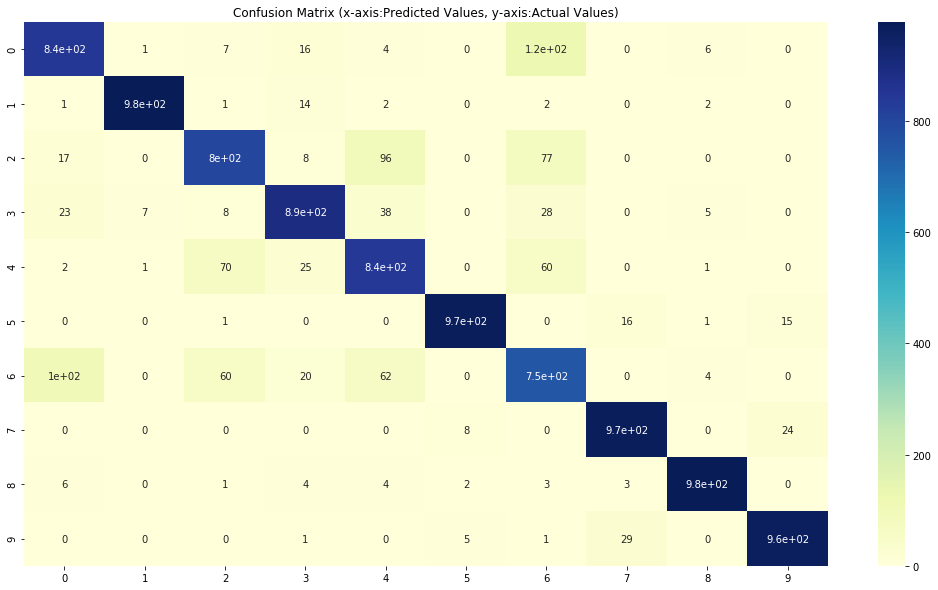

In [33]:
#printing of confusion matrix
conf_mat=sklearn.metrics.confusion_matrix(act_list, pred_list)
plt.figure(figsize=(18,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(conf_mat, annot=True, cmap="YlGnBu")
ax.set_title('Confusion Matrix (x-axis:Predicted Values, y-axis:Actual Values)')

I have used sklearn.metrics to evaluate the fit of the model on the test data. The description of the parameters are:<br><br>
<b>Precision</b><br>
Precision identifies what proportion of positive prediction are correct.<br>
Formula:Precision=TP/TP+FP<br>
<b>Recall</b><br>
Recall identifies what proportion of positive samples are identified correctly.<br>
Formula:Recall=TP/TP+FN<br><br>
<b>F1-Score</b><br>
F1 Score is a measure of how accurate is the model. It is calculated using Precision & Recall. Accuracy can sometimes be influenced by the count of True Negative. If the count of actual negatives are very high or there is an uneven distribution of sample count for each class, the accuracy may not be a good measure to check if the model is working or not. F1 can be a good measure in these cases, as it does not take true negative in consideration.
<br>
Formula: F1 Score=2*(Precision * Recall)/(Precision+Recall)<br>
<b>Support</b><br>
The support is the number of samples of the true response that lie in that class.
<br>
<br>
<b>Macro & Weighted Average</b>
<li>Macro calculates the unweighted average of metrics of all the class
<li>Weighted average find their average weighted by support (the number of true instances for each label). 

In [34]:
#Results for each class
metrics=sklearn.metrics.classification_report(act_list, pred_list)
print(metrics)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.84      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.75      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<b>Comment on Results</b><br><br>
The above results are quite satisfactory if not excellent. We can see that the results for values 0 (tshirt/top), 2 (pullover), 4 (coat) and 6 (shirt) are not as good as compared to the other fashion items. This is because all these fashion items are quite related to each other (as these items are tshirt/top, pullover, coat and shirts respectively) and thus our model could not classify them properly. However, we can increase the accuracy and other results of the model if we use Convolutional Neural Network where we can train the model even better in terms of features of the fashion items.

<b>Conclusion</b><br>
Keras is a simple but powerful Neural Network API, which makes implementing Neural Network easy and straightforward. This was a basic demonstration on how to use Keras. The basic steps of building Keras Neural Network are- <br>
Find a dataset and transform according to requirement, create a Keras model (we used sequential, others like functional can be used too) with multiple layers using appropriate activation function, compile the model using relevant loss function and optimizer, fit (or train) the model using using the train data and finally evaluate the trained model on the test data.